# Credit Card Fraud detection based on Kaggle Data

##### Data Source : https://www.kaggle.com/mlg-ulb/creditcardfraud


## Overview:

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

##### Download data from : https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcard.csv/3


## Goals:
1. Understanding the data with visualization
2. Trying Liner regression algorithm (for now)
3. Understanding which features are more/less responsible for making the descisions(We nt are expecting different results here since PCA is used to reach to these features.)
4. Trying different feature engineering approaches
5. Unerstanding confuson matrix and trying to minimize false negative
6. Using cross validation to check if that does change the accuracy of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

filename = "C:\\Users\\LENOVO\\Desktop\\My Programs\\Credit Card\\creditcardfraud\\creditcard.csv"

df = pd.read_csv(filename)
print (df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

print('Percentage distribution of Class is',df['Class'].mean()*100)

We have 492 fraud data points and 284315 nonfraudulent data points.
Percentage distribution of Class is 0.1727485630620034


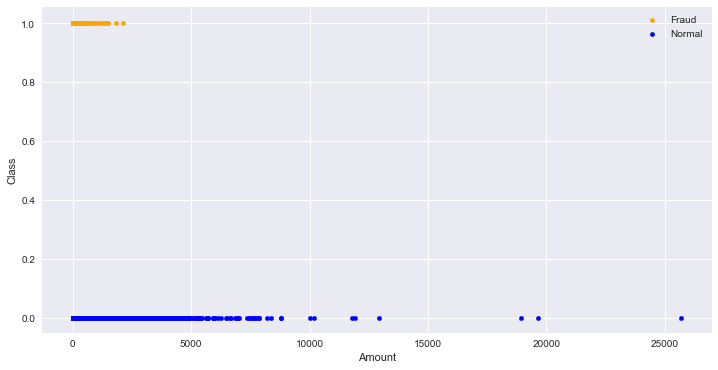

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [4]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

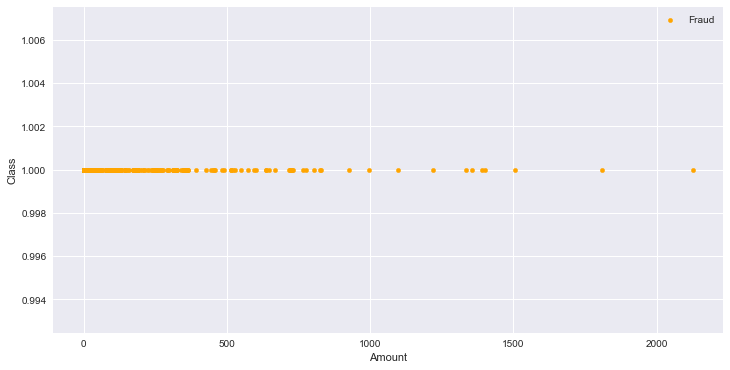

In [5]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

In [ ]:
print(frauds['Amount'].mean())

122.21132113821133


## Understnading distribution of different features wih respect to class

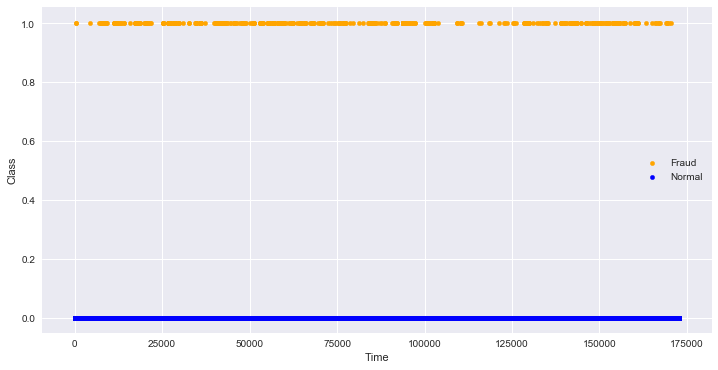

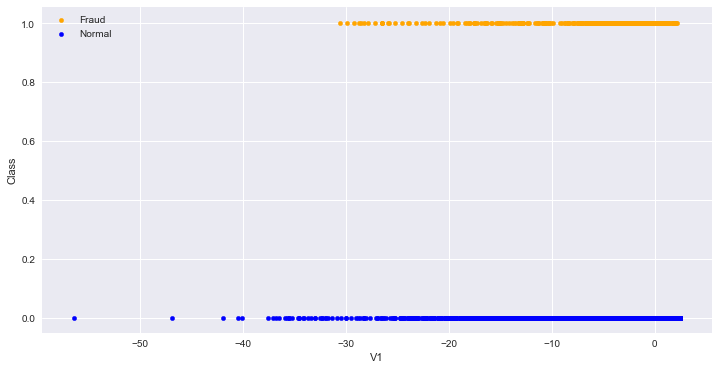

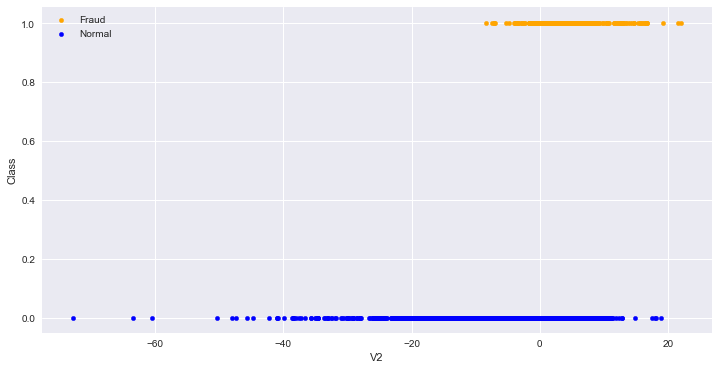

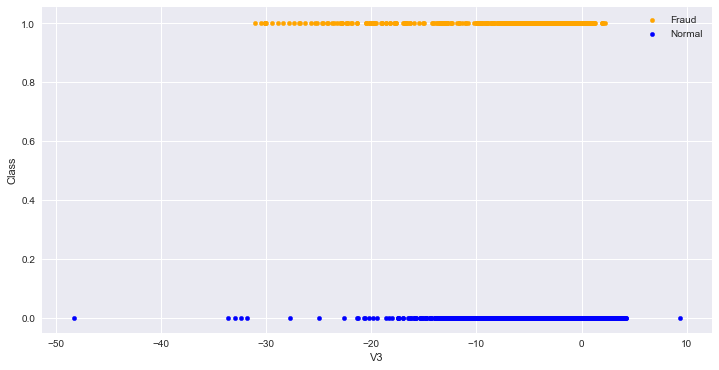

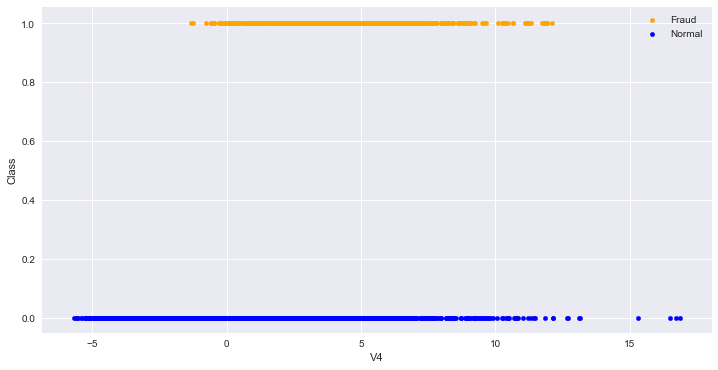

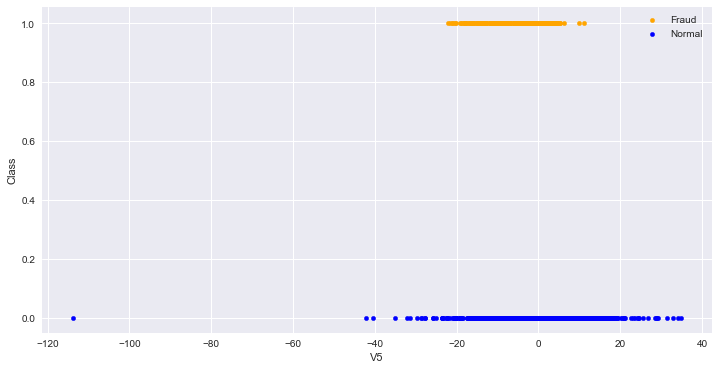

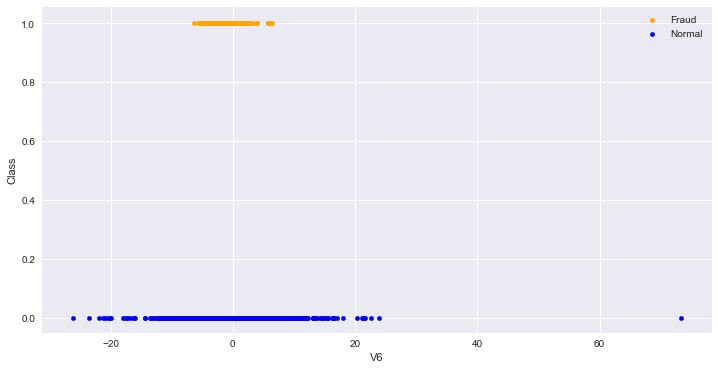

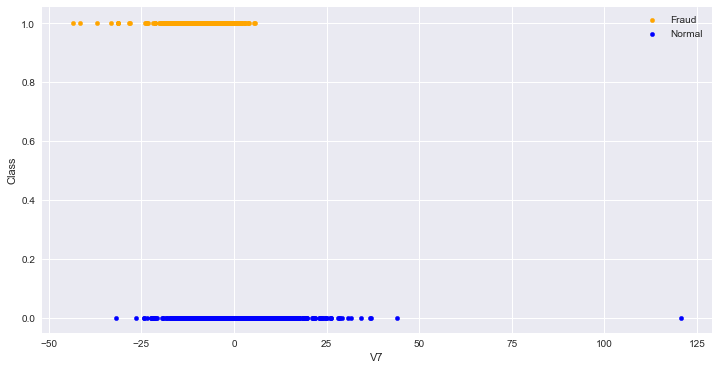

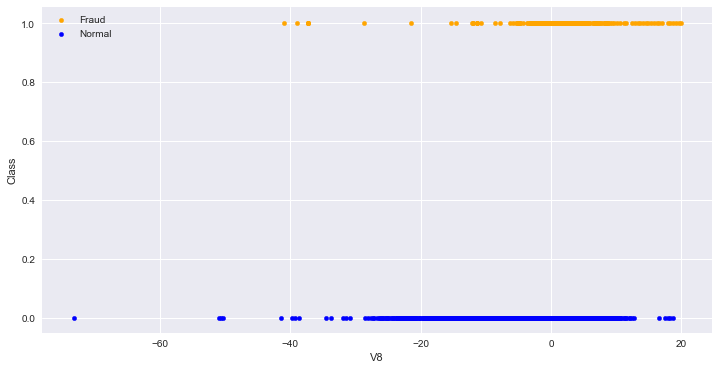

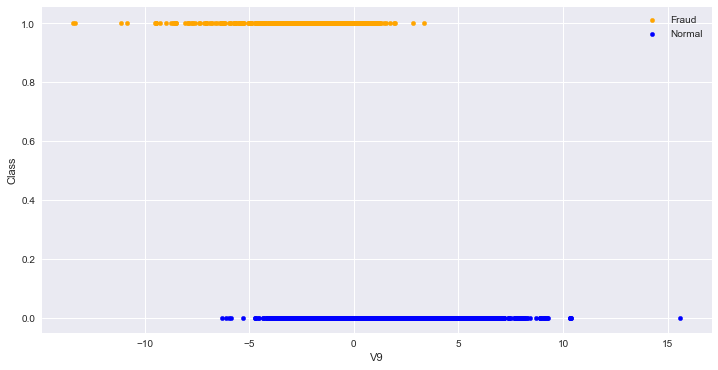

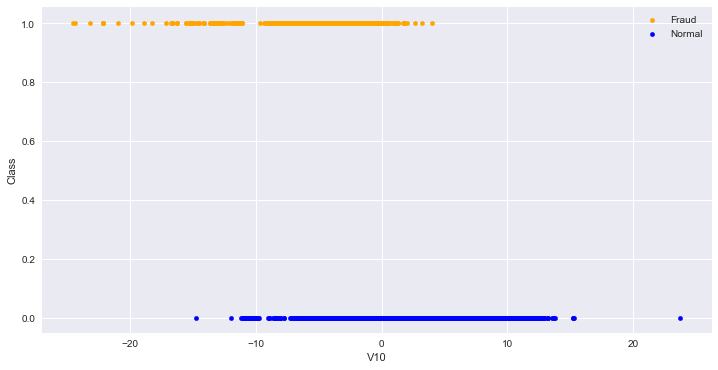

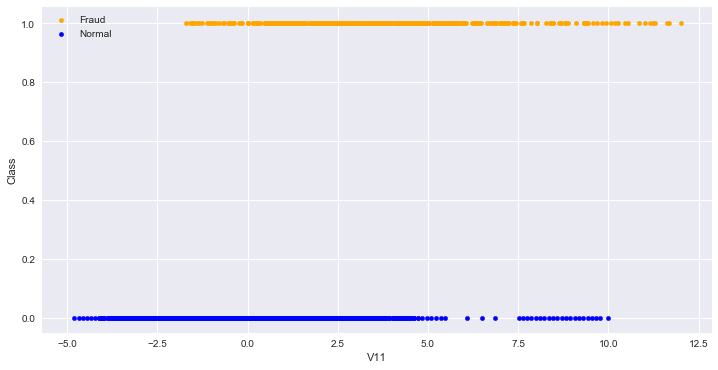

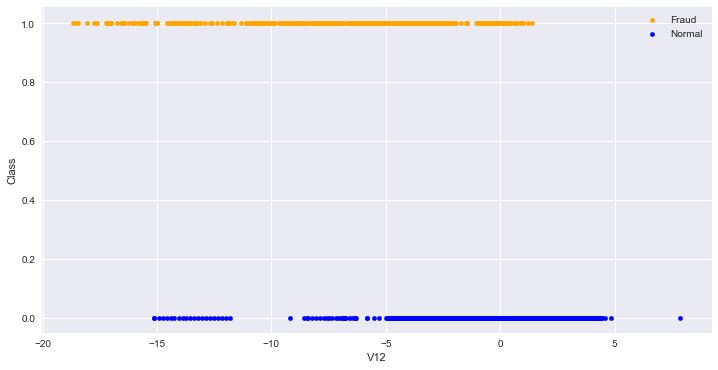

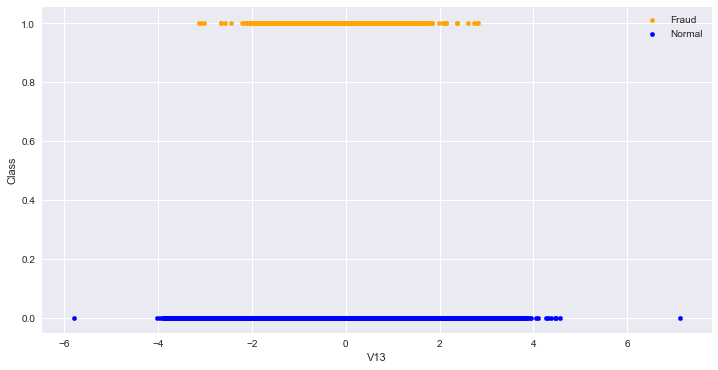

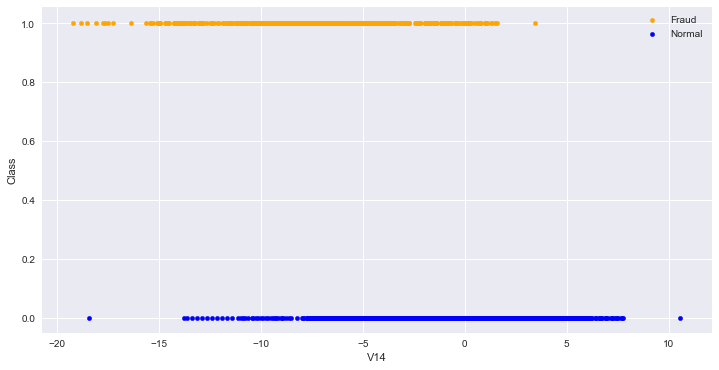

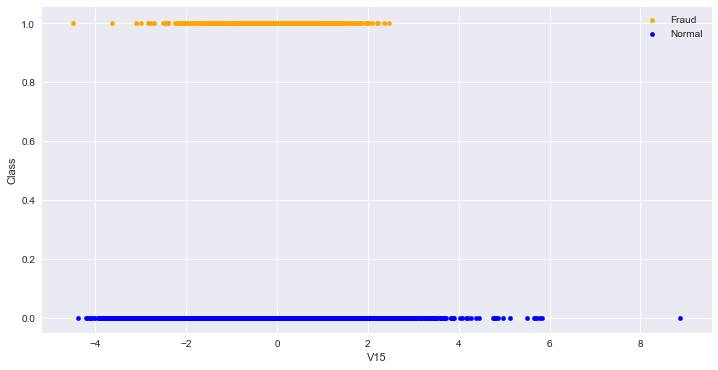

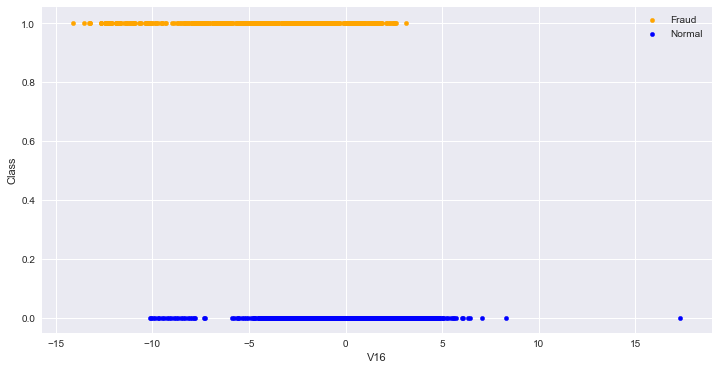

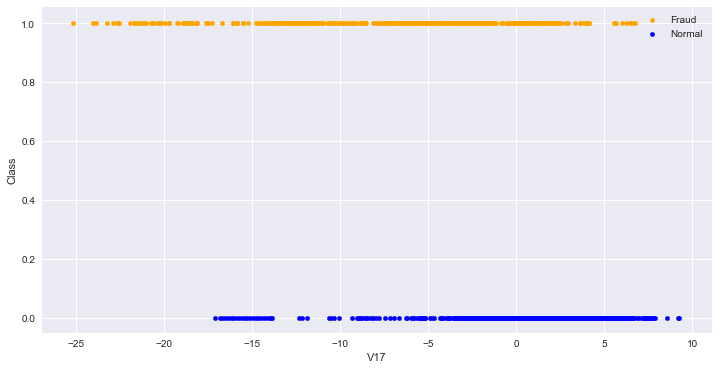

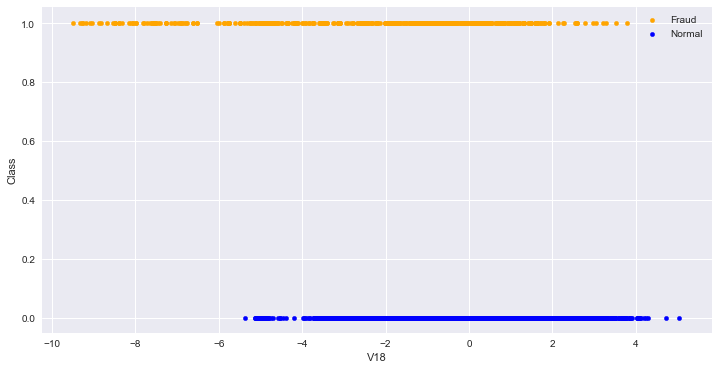

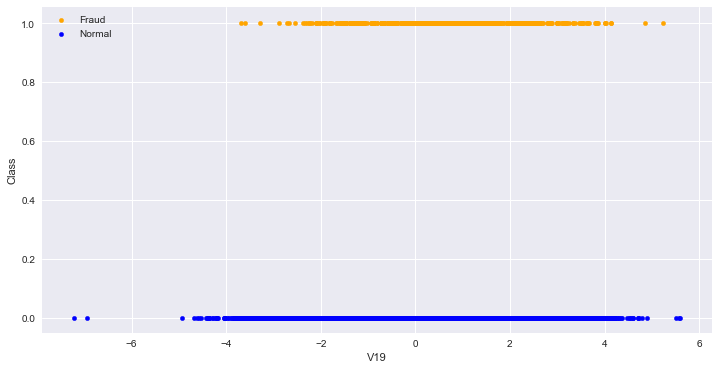

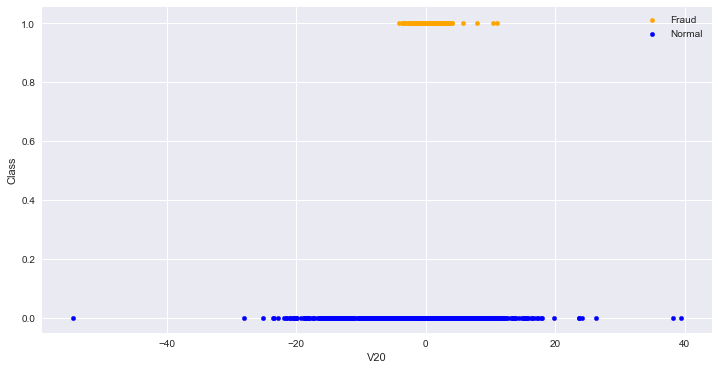

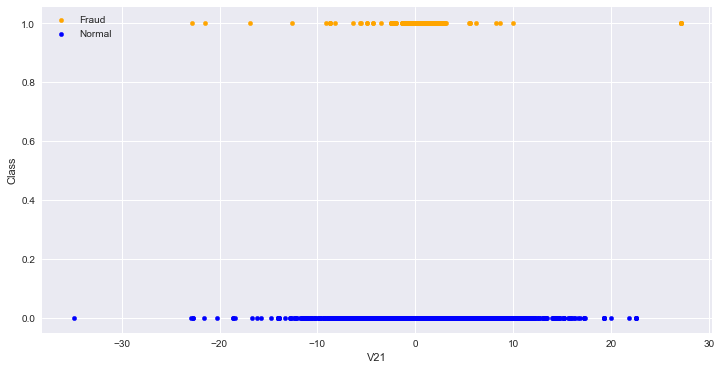

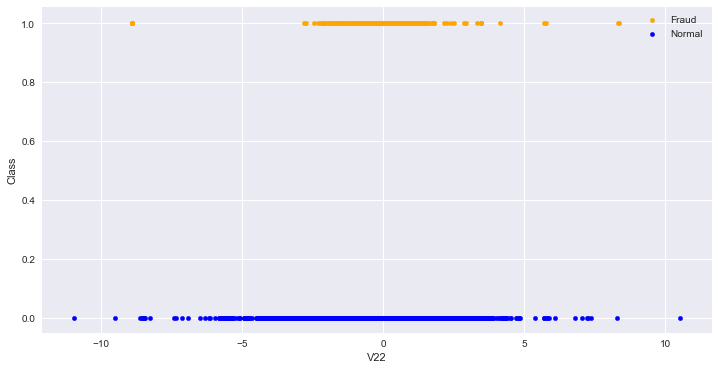

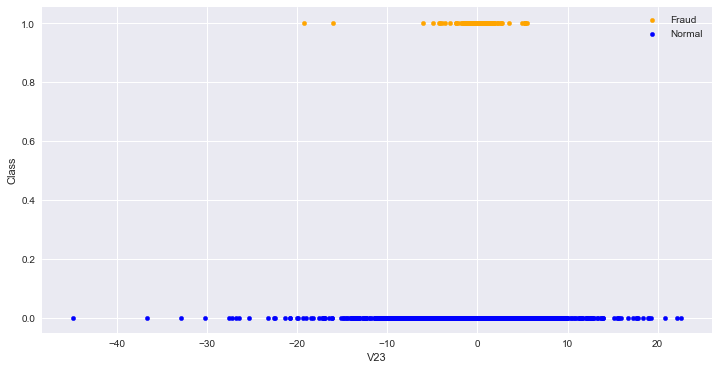

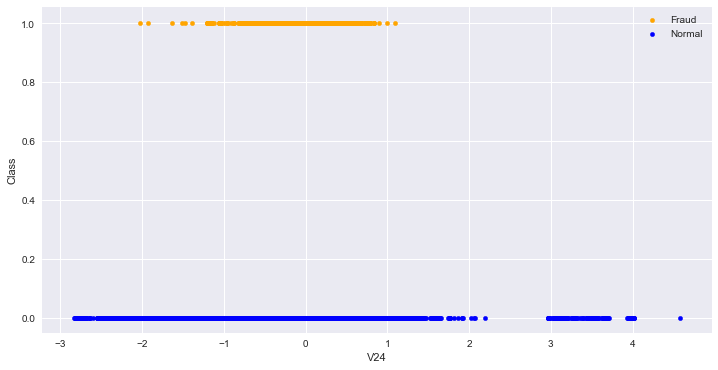

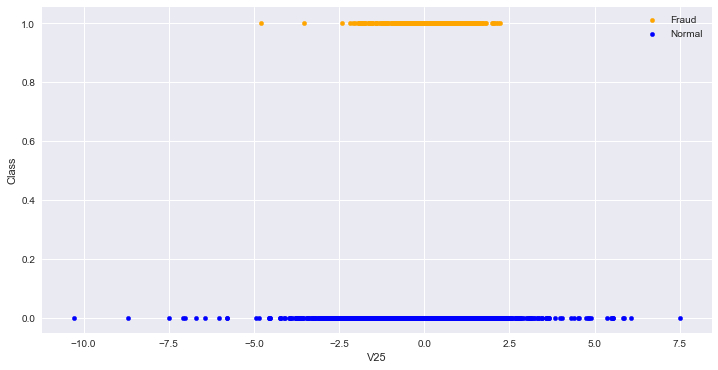

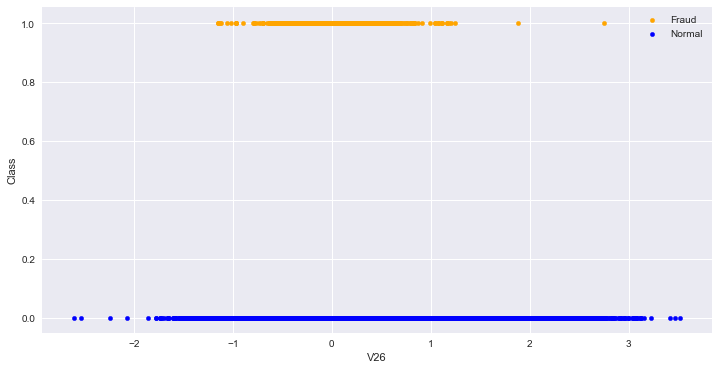

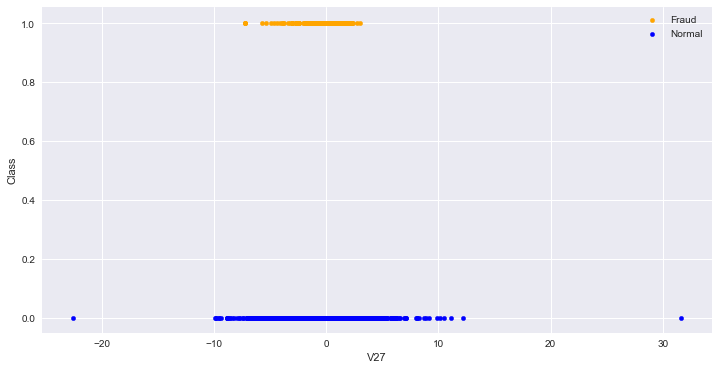

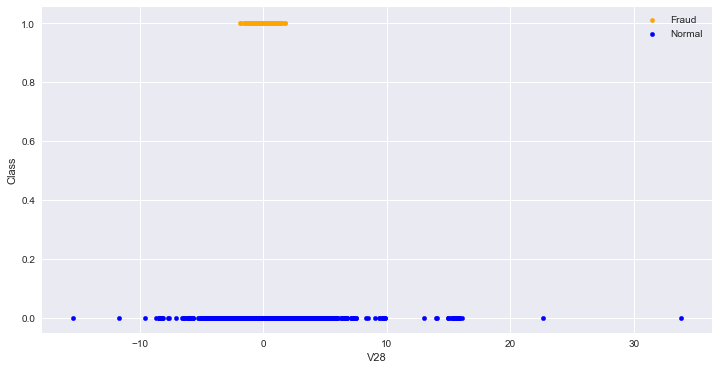

In [ ]:
#print((df.columns))
col_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for i in col_names:
    ax = frauds.plot.scatter(x=i, y='Class', color='Orange', label='Fraud')
    non_frauds.plot.scatter(x=i, y='Class', color='Blue', label='Normal', ax=ax)
    plt.show()


# Model

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[:, df.columns != 'Class']
y = df.loc[:, df.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model = linear_model.LogisticRegression(C=1e5)
model.fit(X_train, y_train)
print("Score in percentage is : ", model.score(X_test, y_test)*100)

# Creating the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = np.array(model.predict(X_test))
y_right = np.array(y_test)

ConfusionMatrix = confusion_matrix(y_right, y_predicted)

print("Confusion matrix: \n", ConfusionMatrix)